In [13]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# 数据库连接参数
DB_HOST = '219.148.159.170'
DB_PORT = 30050
DB_USER = 'lmd'
DB_PASSWORD = 'cWBYNsyShaJWvmA'
DB_NAME = 'large_model_dev'

# 构造数据库连接字符串
# 使用 mysql+pymysql:// 协议表示通过 PyMySQL 驱动连接 MySQL 数据库
DATABASE_URL = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# 创建数据库引擎
try:
    engine = create_engine(DATABASE_URL)
    print(f"成功创建数据库引擎，尝试连接到 {DB_NAME}...")

    detail_table_name = 'blind_review_detail'
    work_table_name = 'lmd_blind_review_work'

    print(f"正在从表 '{detail_table_name}' 读取数据...")
    detail_df = pd.read_sql_table(detail_table_name, engine)
    print(f"\n成功从表 '{detail_table_name}' 读取数据到 Pandas DataFrame！")
    # print("DataFrame 的前5行：")
    # print(detail_df.head())

    print(f"\n正在从表 '{work_table_name}' 读取数据...")
    work_df = pd.read_sql_table(work_table_name, engine)
    print(f"\n成功从表 '{work_table_name}' 读取数据到 Pandas DataFrame！")
    # print("DataFrame 的前5行：")
    # print(work_df.head())


    # 将数据导出为 CSV 文件（可选）
    # output_csv_file = 'blind_review_detail.csv'
    # df.to_csv(output_csv_file, index=False, encoding='utf-8')
    # print(f"\n数据已成功导出到文件：{output_csv_file}")

except pymysql.err.OperationalError as e:
    print(f"\n错误：数据库连接失败或操作错误。请检查以下信息：")
    print(f"- 数据库主机/端口是否正确: {DB_HOST}:{DB_PORT}")
    print(f"- 用户名/密码是否正确")
    print(f"- 数据库 '{DB_NAME}' 是否存在且可访问")
    print(f"- 你的IP地址是否被允许访问该数据库服务器（防火墙设置）")
    print(f"- 具体的错误信息: {e}")

except Exception as e:
    print(f"\n发生未知错误：{e}")

finally:
    # 最佳实践：关闭数据库连接（尽管 SQLAlchemy 引擎通常会自动管理连接池）
    if 'engine' in locals():
        engine.dispose()
        print("\n数据库连接已关闭。")

成功创建数据库引擎，尝试连接到 large_model_dev...
正在从表 'blind_review_detail' 读取数据...

发生未知错误：(pymysql.err.OperationalError) (2013, 'Lost connection to MySQL server during query')
(Background on this error at: https://sqlalche.me/e/20/e3q8)

数据库连接已关闭。


In [14]:
work_df.work_name.value_counts().index

Index(['test', 'test1', '核聚变评估基准盲审', '核聚变数据盲审任务（测试）黄贤礼', '核聚变数据盲审任务（正式）刘勇',
       '核聚变数据盲审任务（正式）朱晓军', '核聚变数据盲审任务（正式）杨爽', '核聚变数据盲审任务（正式）宋显明',
       '核聚变数据盲审任务（测试）史国阳', '核聚变数据盲审任务（测试）顾翔', '核聚变数据盲审任务（测试）谢华生',
       '核聚变数据盲审任务（测试）陈建国', '核聚变数据盲审任务（正式）包蕊', '核聚变数据盲审任务（测试）李毅',
       '核聚变数据盲审任务（测试）董力立', '核聚变数据盲审任务（测试）孙恬恬', '核聚变数据盲审任务（测试）王嵎民',
       '核聚变数据盲审任务（测试）于一丁', '核聚变数据盲审任务（正式）刘兵', '核聚变数据盲审任务（正式）郭栋',
       '核聚变数据盲审任务（正式）孔浩喆', '核聚变数据盲审任务（正式）陈建国', '核聚变数据盲审任务（测试）李松健',
       '核聚变数据盲审任务（测试）王维', '核聚变数据盲审任务（正式）史国阳', '核聚变数据盲审任务（正式）顾翔',
       '核聚变数据盲审任务（正式）黄贤礼', '核聚变数据盲审任务（正式）王维', '核聚变数据盲审任务（正式）谢华生',
       '核聚变数据盲审任务（测试）郭栋', '核聚变数据盲审任务（正式）李毅', '核聚变数据盲审任务（正式）董力立',
       '核聚变数据盲审任务（正式）孙恬恬', '核聚变数据盲审任务（正式）王嵎民', '核聚变数据盲审任务（正式）于一丁',
       '核聚变数据盲审任务（正式）宋绍栋', '核聚变数据盲审任务（测试）宋绍栋', '核聚变数据盲审任务（测试）孔浩喆', 'T01',
       'test-new新奥20', '0613盲审数据新奥17', '0613盲审数据', 'test新奥17', '测试盲审任务',
       'gmytest新奥17', 'gmytest', 'test-new新奥21', '核聚变数据盲审任务（测试）王芸红',
       'test-new', '核聚变评估数据盲审（测试）', '核聚变评估数据盲审任务（

In [15]:
# 筛选条件1: work_name 包含 '（正式）'
condition_formal = work_df['work_name'].str.contains('（正式）', na=False)

# 筛选条件2: work_name 不包含 'liutianyuan' 或 'chenjianguo' 或 'guomengyu'
# 使用 '|' (或) 运算符来组合多个排除条件
excluded_names = ['liutianyuan', 'chenjianguo', 'guomengyu']
condition_excluded = ~work_df['work_name'].str.contains('|'.join(excluded_names), na=False)

# 筛选条件3: work_name 不为核聚变数据盲审任务（正式）
condition_not_fusion = work_df['work_name'] != '核聚变数据盲审任务（正式）'
filtered_work_df = work_df[condition_formal & condition_excluded & condition_not_fusion]
filtered_work_df.work_name.value_counts()

work_name
核聚变数据盲审任务（正式）刘硕     1
核聚变数据盲审任务（正式）王嵎民    1
核聚变数据盲审任务（正式）史国阳    1
核聚变数据盲审任务（正式）顾翔     1
核聚变数据盲审任务（正式）黄贤礼    1
核聚变数据盲审任务（正式）王维     1
核聚变数据盲审任务（正式）陈建国    1
核聚变数据盲审任务（正式）谢华生    1
核聚变数据盲审任务（正式）李毅     1
核聚变数据盲审任务（正式）董力立    1
核聚变数据盲审任务（正式）孙恬恬    1
核聚变数据盲审任务（正式）于一丁    1
核聚变数据盲审任务（正式）王芸红    1
核聚变数据盲审任务（正式）宋绍栋    1
核聚变数据盲审任务（正式）郭栋     1
核聚变数据盲审任务（正式）孔浩喆    1
核聚变数据盲审任务（正式）包蕊     1
核聚变数据盲审任务（正式）刘兵     1
核聚变数据盲审任务（正式）刘勇     1
核聚变数据盲审任务（正式）朱晓军    1
核聚变数据盲审任务（正式）杨爽     1
核聚变数据盲审任务（正式）宋显明    1
核聚变数据盲审任务（正式）李松健    1
Name: count, dtype: int64

In [20]:
detail_df.head()

,id,review_work_id,question,model_name,answer,score,question_score,review,create_time,create_user_id,update_user_id,data_user_id,data_dept_id,is_delete,str_id,field,review_state
0,1929719106487980032,1929719104508268544,如何从单粒子运动轨迹理论出发，推导并解释磁镜约束的基本原理及其对聚变装置设计的意义？讨论绝热...,openai/o3_answer,**1. 核心结论** \n磁镜约束利用空间变化的磁场强度，依靠带电粒子动量的绝热不变量，...,[],NaN,[],2025-06-03 09:57:42,1742014705053995008,1742014705053995008,NaN,NaN,1,None,等离子体物理基础,None
1,1929719106487980033,1929719104508268544,推导均匀磁化冷等离子体中平行传播的右旋圆偏振电磁波（R波）和左旋圆偏振电磁波（L波）的色散关...,openai/o3_answer,### 1. 核心结论\n\n- 均匀磁场中冷等离子体平行传播圆偏振波的色散关系为 $n^2...,[],NaN,[],2025-06-03 09:57:42,1742014705053995008,1742014705053995008,NaN,NaN,1,None,等离子体物理基础,None
2,1929719106487980034,1929719104508268544,估算在典型托卡马克等离子体参数下（如电子温度 Te​=5keV，电子密度 ne​=1020m...,openai/o3_answer,"**核心结论** \n在 $T_e = 5\,\rm{keV}$、$n_e = 10^{2...",[],NaN,[],2025-06-03 09:57:42,1742014705053995008,1742014705053995008,NaN,NaN,1,None,等离子体物理基础,None
3,1929719106487980035,1929719104508268544,什么是反常输运？详细讨论一种主要的微观不稳定性（如离子温度梯度模ITG）是如何驱动反常输运的...,openai/o3_answer,**1. 核心结论** \n反常输运是指等离子体中的粒子、能量等输运远高于经典（或新古典）...,[],NaN,[],2025-06-03 09:57:42,1742014705053995008,1742014705053995008,NaN,NaN,1,None,等离子体物理基础,None
4,1929719106487980036,1929719104508268544,描述等离子体鞘层的形成过程和主要特征（如德拜鞘层、预鞘层）。鞘层在等离子体与壁相互作用（PM...,openai/o3_answer,核心结论 \n—— 等离子体鞘层是在等离子体与固体壁（或探针等）接触区自发形成的带电层结构...,[],NaN,[],2025-06-03 09:57:42,1742014705053995008,1742014705053995008,NaN,NaN,1,None,等离子体物理基础,None


In [16]:
assigned_work_ids = filtered_work_df.id.tolist()
# 过滤 detail_df 中的 review_work_id
filtered_detail_df = detail_df[detail_df['review_work_id'].isin(assigned_work_ids)]
print(f"\n筛选后的 detail_df 行数: {len(filtered_detail_df)}")


筛选后的 detail_df 行数: 11960


In [17]:
filtered_detail_df['score'].value_counts()

score
0    11724
2      143
1       93
Name: count, dtype: int64

In [18]:
result = filtered_detail_df[filtered_detail_df['score']=='2']['model_name'].value_counts()
result = result.rename(index={'新奥QA测试-32B蒸馏_answer': 'deepseek-ai/DeepSeek-R1-Distill-Qwen-32B'})
print(result)

model_name
openai/o3_answer                            53
deepseek/deepseek-r1_answer                 39
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B    30
google/gemini-2.5-pro-preview_answer        21
Name: count, dtype: int64


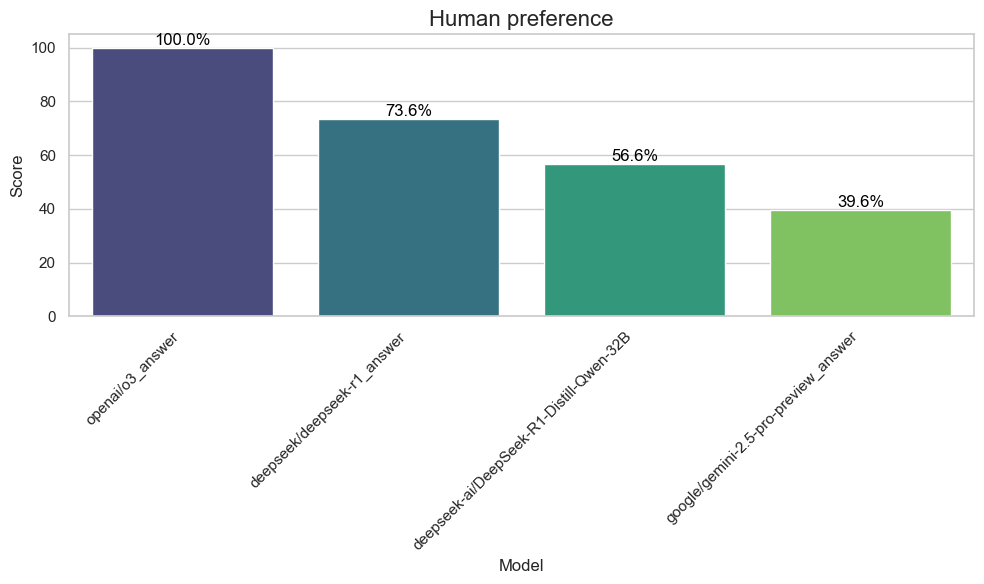

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# result = pd.Series({
#     'openai/o3_answer': 53,
#     'deepseek-ai/deepseek-r1_answer': 39,
#     'deepseek-ai/DeepSeek-R1-Distill-Qwen-32B': 30,
#     'google/gemini-2.5-pro-preview_answer': 21
# }, name='count')
max_points = result.max()
normalized_result = (result / max_points * 100)
normalized_result_df = normalized_result.reset_index()

normalized_result_df.columns = ['model_name', 'count']

# 计算最大好评数
max_count = normalized_result_df['count'].max()

# 计算相对最佳模型的归一化表现（百分比）
normalized_result_df['Normalized Performance (%)'] = (normalized_result_df['count'] / max_count) * 100

# 按照归一化表现降序排序 DataFrame
df_sorted = normalized_result_df.sort_values(by='Normalized Performance (%)', ascending=False)

# 设置 seaborn 的主题风格（可选，让图表更美观）
sns.set_theme(style="whitegrid")

# 创建一个 matplotlib 图形和轴对象，并设置图表大小
plt.figure(figsize=(10, 6))

# 使用 seaborn.barplot 创建条形图
barplot = sns.barplot(
    x='model_name',
    y='Normalized Performance (%)',
    hue='model_name',
    data=df_sorted,
    palette='viridis' # 选择一个颜色方案
)

# 添加图表标题和轴标签
plt.title('Human preference', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)

# 旋转 X 轴标签，以防重叠，并调整对齐方式
plt.xticks(rotation=45, ha='right')

# 在每个条形上方添加具体的百分比数值
for index, row in df_sorted.iterrows():
    barplot.text(
        index, # X 轴位置
        row['Normalized Performance (%)'], # Y 轴位置
        f"{row['Normalized Performance (%)']:.1f}%", # 格式化为一位小数的百分比
        color='black', # 文本颜色
        ha="center", # 水平居中对齐
        va='bottom' # 垂直底部对齐
    )

# 自动调整图表布局，防止标签被裁剪
plt.tight_layout()


# 关闭图表以释放内存
plt.show()

In [23]:
filtered_detail_df[filtered_detail_df['score'] == '2']['field'].value_counts()

field
计算等离子体物理与集成建模      31
托卡马克与仿星器运行与控制      29
聚变包层与氚增殖技术         26
等离子体诊断             26
聚变装置工程、建造与遥操作系统    23
等离子体加热与电流驱动         8
Name: count, dtype: int64

In [24]:
filtered_detail_df[filtered_detail_df['score'] == '1']['field'].value_counts()

field
等离子体诊断             38
聚变装置工程、建造与遥操作系统    17
聚变包层与氚增殖技术         14
计算等离子体物理与集成建模       9
等离子体加热与电流驱动         8
托卡马克与仿星器运行与控制       7
Name: count, dtype: int64

In [25]:
filtered_detail_df[filtered_detail_df['score'] != '0']['field'].value_counts()

field
等离子体诊断             64
聚变装置工程、建造与遥操作系统    40
聚变包层与氚增殖技术         40
计算等离子体物理与集成建模      40
托卡马克与仿星器运行与控制      36
等离子体加热与电流驱动        16
Name: count, dtype: int64